In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
#Merging the two datasets
df = athletes.merge(regions, how = 'left', on = 'NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
# Rename Column names 
df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace= True)

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [11]:
#Nigeria details
df.query("Team == 'Nigeria'").head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Lightweight,NaN,Nigeria,NaN
544,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
545,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN
546,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
547,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN


In [12]:
#Top countries participating since 1896
top_10_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

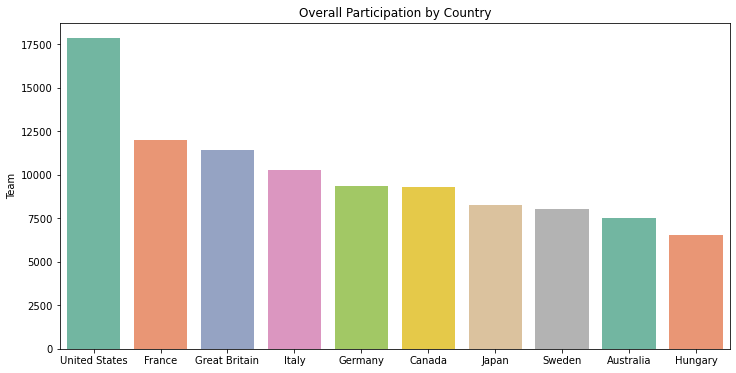

In [13]:
#Plot for top 10 countries
plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y = top_10_countries, palette = 'Set2');

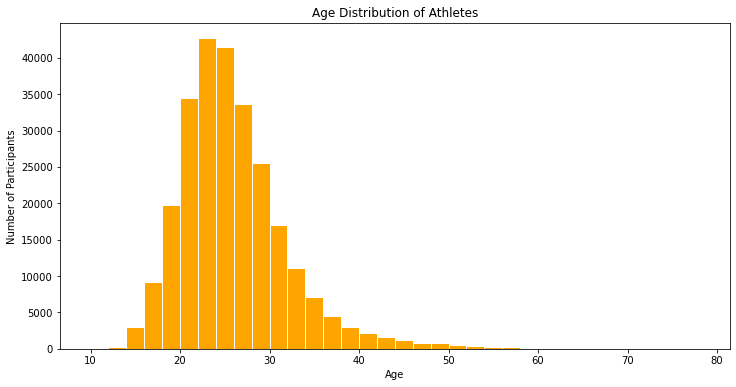

In [14]:
#### Age Distribution of the Athletes
plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(df.Age, bins = np.arange(10, 80, 2), color = 'orange', edgecolor= 'white');

In [15]:
#Display of winter sports
winter_sports= df[df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [16]:
#Display of summer sports
summer_sports= df[df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [17]:
# Male and Female participants
gender_counts = df.Sex.value_counts()
gender_counts


M    196594
F     74522
Name: Sex, dtype: int64

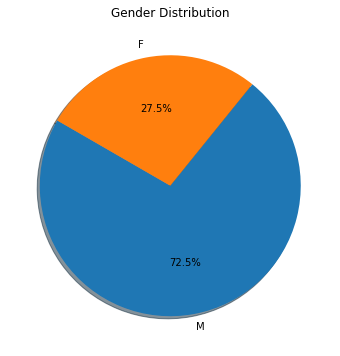

In [18]:
# Male and Female participants
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',  startangle=150, shadow = True);



In [19]:
women_olympics= df[(df.Sex == 'F') & (df.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

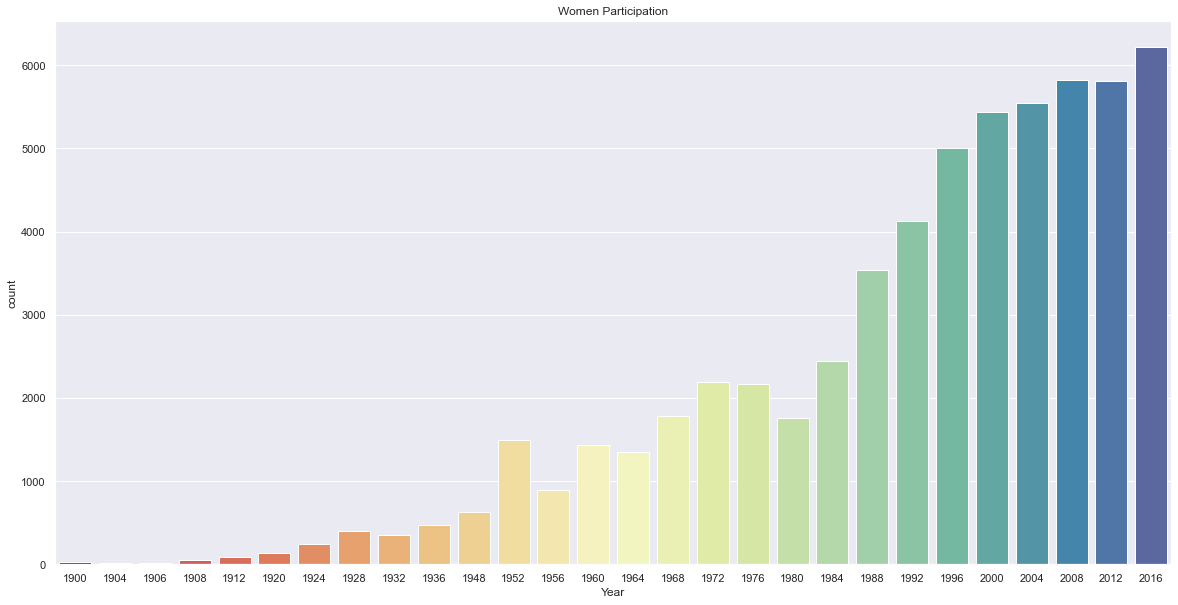

In [20]:
#Plotting female participation since inception of the games 
sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x= 'Year', data = women_olympics, palette = 'Spectral')
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

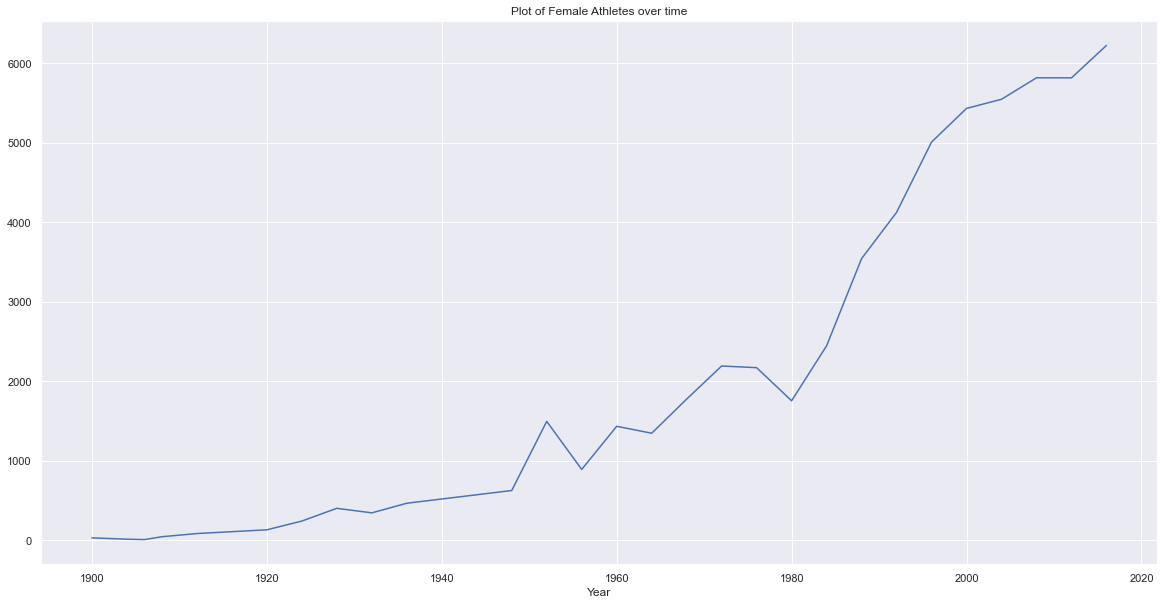

In [21]:
part = women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:, 'F'].plot()
plt.title('Plot of Female Athletes over time')

In [28]:
#Most Recent Gold medalists as at 2016
goldMedals = df[(df.Medal == 'Gold')]
goldMedals.sort_values('Year', ascending = False).head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
137418,69088,Melanie Leupolz,F,22.0,173.0,52.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Gold,Germany,NaN
248007,124162,Greg Van Avermaet,M,31.0,181.0,74.0,Belgium,BEL,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Men's Road Race, Individual",Gold,Belgium,NaN
76390,38761,English Gardner,F,24.0,168.0,55.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold,USA,NaN
246347,123361,Laura Emma Unsworth,F,28.0,157.0,55.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Women's Hockey,Gold,UK,NaN
74440,37808,Gabriel Fernando de Jesus,M,19.0,175.0,68.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold,Brazil,NaN
74439,37807,Gabriel Barbosa Almeida,M,19.0,178.0,68.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold,Brazil,NaN
73971,37589,Magdalena Fularczyk-Kozowska,F,29.0,173.0,70.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Double Sculls,Gold,Poland,NaN
73579,37396,Fu Haifeng,M,32.0,181.0,78.0,China-1,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,Gold,China,NaN
247823,124080,Thibaut Vallette,M,42.0,171.0,60.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Gold,France,NaN
72315,36785,"Melissa Jeanette ""Missy"" Franklin",F,21.0,188.0,77.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,Gold,USA,NaN


In [33]:
#Gold Medals by Country
goldMedals.Region.value_counts().reset_index(name= 'Medal').head(10)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


In [37]:
# RIO OLYMPICS
max_year = df.Year.max()
print(max_year)
team_names = df[(df.Year == max_year) & (df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'CountryWise  Medals  for the year 2016')

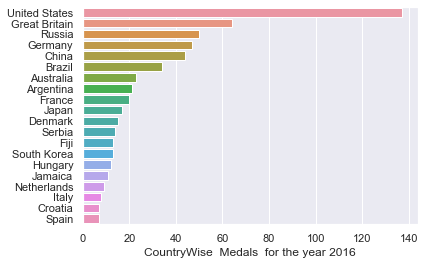

In [41]:
#Top 20 countries with the most Gold medals in RIO 2016 Olympics 
sns.barplot(x=team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('CountryWise  Medals  for the year 2016')